### Ingredients for classification

#### Source of knowledge

- Feature representation
    - problem specific
- Unlabeled data?
    - case 1: Unsupervised Learning
        - go ahead without label 
            - seq2seq end to end model
    - case 2: Supervised Learning
        - add label to data by training
            - semantic interpretation of (mostly unlabeled images -> IMAGE-CAPTION or untagged texts -> POS)
                - mainly the idea of Encoder-Decoder apply here
                    - Image-Cap: 
                        - Encoder (Convolutional NN): image -> feature map
                        - Decoder (RNN / LSTM) feature map -> readable sentence

        

### KNN

#### Standardization

Standardization can be important __when the varibales are not all measured on the same scale__

- 0-1 scaling

$$range = max - min$$

$$\frac{(i-min)}{range}$$


#### K Nearest neightbor Classifier

- Learning phase

For each training example $(X_p, f(X_p))$, store the sample in memory

- Classification Phase

Given a query instance $X_p$ identify the $k$ nearest neighbors $X_1, ..., X_k$ of $X_q$

Assign $X_q$ as the label of the majority class

$$g(X_q) = \arg \max_w(\sum^K_{i=1}\delta(w, f(x_i))$$ 

where

$$\delta(a, b) = 1 iff a=b \text{ and } \delta(a,b)=1 $$


#### Distance weighted K nearest neighbor classifier

- Learning phase

For each training example $(X_p, f(X_p))$, store the sample in memory

- Classification Phase

Given a query instance $X_p$ identify the $k$ nearest neighbors $X_1, ..., X_k$ of $X_q$

$$KNN(X_q) = \{ X_1, ..., X_q\}$$

__And obtain a weighted note, with each nn getting a vote in favor of its class label that's weighted by the distance to the query__

$$w = \frac{1}{d(X_i, X_q)^2}$$


### Distance Measures - depends on the data representation

$d(p, q)$ between two points p and q is a proper distance measure if it satisfies:

- Positive definiteness:
    - $d(p,q) \ge 0$ for all p and q and $d(p,q)=0$ only if $p=q$
    
- Symmetry: $d(p,q) = d(q,p)$ for all p and q
- Triangle inequality:
    - $d(p,q) \le d(p,q)+d(q,r)$ for all points p, q and r

#### Cosine Distance

If $d_1$ and $d_2$ are two document vectors, then

$$1- \cos (d_1, d_2) = 1- \frac{d_1 \cdot d_2}{||d_1|| \cdot ||d_2||}$$

#### Euclidean Distance

$$\sqrt{\sum^d_{j=1}(p_j - q_j)^2}$$

#### Minkowski distance

- a generalization of Euclidean distance
- $$\sqrt[n]{\sum^d_{j=1} |p_i - q_j|^n}$$


### Distance measures in Boolean spaces

- n=1 Manhattan distance
- n=2 Euclidean distance

### One-hot Encoding

__Neutral Encoding: does not infer any implicit similarities__

In [26]:
## define the one-hot transformation
import numpy as np
def convert_to_one_hot(y):
    y_idx = list(map(lambda x: x-1, y))
    return np.eye(len(y))[y_idx, :]

## or use package 
## from tensorflow: 
# import tensorflow as tf
# tf.one_hot(y, depth=len(y))

## from keras
# import keras
# keras.utils.to_categorical(list(map(lambda x: x-1, y)), num_classes=len(y))

### Tuning the Algorithm

Tweaking the hyperparameters:

__eg: tweaking k in KNN: depend on the density of the available dataset__

- grid search (based on the improvement of accuracy / loss convergence)
- based on experience of the range of k when it works the best

__Note:__
- If k is too small, the classifier will be too sensitive to noise points
- If k is too large, neighborhood may include points from other class, thus undermining the accuracy

### Takeaways:

- NN Classifier are conceptually simple
- Learn by simply memorizing training examples
- The computational effort of learning is low
- The storage requirement of learning is high
    - need to memorize the examples in the training set
- Cost of classifiying new instances can be high
    - Use efficient data strutures and algorithms for NN search 
        - __k-d trees__
        - __locality sensitive hashing__
- A distance measure needs to be defined over the input space
- Performance degrades when there are many irrelevant attributes
    - dim reduction? (linear / non-linear)
        - PCA
        - T-SNE

#### KD Tree (k-dimensional tree)

KD Tree 是一种分割k维数据空间的数据结构，常用来多维空间关键数据的搜索(如：范围搜素及近邻搜索)，是二叉空间划分树的一个特例。

通常，对于维度为k，数据点数为N的数据集，k−d tree适用于N≫2k的情形

----

假设有6个二维数据点{(2,3),(5,4),(9,6),(4,7),(8,1),(7,2)}数据点位于二维空间内

![](https://img-blog.csdn.net/20180307162809441)

k-d树算法就是要确定图1中这些分割空间的分割线(多维空间即为分割平面，一般为超平面)

----
节点生成程序:

　　(1)确定split域：
  
      对于所有描述子数据（特征矢量），统计它们在每个维上的数据方差。以SURF特征为例，描述子为64维，可计算64个方差。挑选出最大值，对应的维就是split域的值。数据方差大表明沿该坐标轴方向上的数据分散得比较开，在这个方向上进行数据分割有较好的分辨率；
  
　   (2)确定Node-data域：
    
        数据点集Data-set按其第split域的值排序。位于正中间的那个数据点被选为Node-data。此时新的Data-set’ = Data-set\Node-data（除去其中Node-data这一点)
----
        
dataleft = {d属于Data-set’ && d[split] ≤ Node-data[split]} 

Left_Range = {Range && dataleft} 

dataright = {d属于Data-set’ && d[split] > Node-data[split]}

Right_Range = {Range && dataright}

----

过程如下：

　　由于此例数据维度只有2维，所以可以简单地给x，y两个方向轴编号为0,1，也即split={0,1}
  
　　（1）确定split域的首先该取的值。分别计算x，y方向上数据的方差得知x方向上的方差最大，所以split域值首先取0，也就是x轴方向； 
  
　　（2）确定Node-data的域值。根据x轴方向的值2,5,9,4,8,7排序选出中值为7，所以Node-data=(7,2)。这样，该节点的分割超平面就是通过(7,2)并垂直于split = 0(x轴)的直线x=7； 
  
　　（3）确定左子空间和右子空间。分割超平面x=7将整个空间分为两部分，如图所示。x≤7的部分为左子空间，包含3个节点{(2,3),(5,4),(4,7)}；另一部分为右子空间，包含2个节点{(9,6),(8,1)}
  
  ![](https://img-blog.csdn.net/20180307183857893)
  
  最后生成的k-d树如图:
  
  
  ![](https://img-blog.csdn.net/2018030718553761)
  
----

- k-d树上的KNN



__而找到的叶子节点并不一定就是最邻近的，最邻近肯定距离查询点更近，应该位于以查询点为圆心且通过叶子节点的圆域内__


----

为了找到真正的最近邻，还需要进行’回溯’操作：

__算法沿搜索路径反向查找是否有距离查询点更近的数据点__

----

实例:

如查找点为(2,4.5)。先进行二叉查找，先从(7,2)查找到(5,4)节点，在进行查找时是由y=4为分割超平面的，由于查找点为y值为4.5，因此进入右子空间查找到(4,7)，形成搜索路径<(7,2),(5,4),(4,7)>

取(4,7)为当前最近邻点，计算其与目标查找点的距离为3.202。然后回溯到(5,4)，计算其与查找点之间的距离为3.041。以(2,4.5)为圆心，以3.041为半径作圆，如图所示。可见该圆和y=4超平面交割，所以需要进入(5,4)左子空间进行查找。
![](https://img-blog.csdn.net/2018030719262316)
此时需将(2,3)节点加入搜索路径中得<(7,2),(2,3)>。

回溯至(2,3)叶子节点,(2,3)距离(2,4.5)比5,4)要近，所以最近邻点更新为(2,3)，最近距离更新为1.5。

回溯至(7,2)，以(2,4.5)为圆心1.5为半径作圆，并不和x=7分割超平面交割，如图所示。至此，搜索路径回溯完。返回最近邻点2,3)，最近距离1.5

![](https://img-blog.csdn.net/20180307192815279)




In [75]:
# code from https://github.com/guoswang/K-D-Tree

import numpy as np
import matplotlib.pyplot as plt
from time import time

def createKDTree(dataSet, depth):
    n = np.shape(dataSet)[0]
    treeNode = {}
    if n == 0:
        return None
    else:
        n, m = np.shape(dataSet)
        split_axis = depth % m
        depth += 1
        treeNode['split'] = split_axis
        dataSet = sorted(dataSet, key=lambda a: a[split_axis])
        num = n // 2
        treeNode['median'] = dataSet[num]
        treeNode['left'] = createKDTree(dataSet[:num], depth)
        treeNode['right'] = createKDTree(dataSet[num + 1:], depth)
        return treeNode

def searchTree(tree, data):
    k = len(data)
    if tree is None:
        return [0] * k, float('inf')
    split_axis = tree['split']
    median_point = tree['median']
    if data[split_axis] <= median_point[split_axis]:
        nearestPoint, nearestDistance = searchTree(tree['left'], data)
    else:
        nearestPoint, nearestDistance = searchTree(tree['right'], data)
    nowDistance = np.linalg.norm(data - median_point)  # the distance between data to current point
    if nowDistance < nearestDistance:
        nearestDistance = nowDistance
        nearestPoint = median_point.copy()
    splitDistance = abs(data[split_axis] - median_point[split_axis])  # the distance between hyperplane
    if splitDistance > nearestDistance:
        return nearestPoint, nearestDistance
    else:
        if data[split_axis] <= median_point[split_axis]:
            nextTree = tree['right']
        else:
            nextTree = tree['left']
        nearPoint, nearDistanc = searchTree(nextTree, data)
        if nearDistanc < nearestDistance:
            nearestDistance = nearDistanc
            nearestPoint = nearPoint.copy()
        return nearestPoint, nearestDistance

def main():
    point = [2, 4.5]
    point_list = np.array([[2,3], [5,4], [9,6], [4,7], [8,1], [7,2]])
    tree = createKDTree(point_list, depth=0)
    n_p, n_d = searchTree(tree, point)
    print(tree)
    print(n_p,n_d)
    
    fig = plt.figure(0)
    ax = fig.add_subplot(111)
    ax.scatter(point_list[:, 0], point_list[:, 1], cmap=plt.cm.Paired)

    ax.scatter(point[0], point[1], c='g', s=50)
    ax.annotate('target point', xy=(point[0]+0.3, point[1]+0.3))
    ax.scatter(n_p[0], n_p[1], c='r', s=50)
    ax.annotate('nearest point', xy=(n_p[0]+0.3, n_p[1]+0.3))
    plt.show()


{'split': 0, 'median': array([7, 2]), 'right': {'split': 1, 'median': array([9, 6]), 'right': None, 'left': {'split': 0, 'median': array([8, 1]), 'right': None, 'left': None}}, 'left': {'split': 1, 'median': array([5, 4]), 'right': {'split': 0, 'median': array([4, 7]), 'right': None, 'left': None}, 'left': {'split': 0, 'median': array([2, 3]), 'right': None, 'left': None}}}
[2 3] 1.5


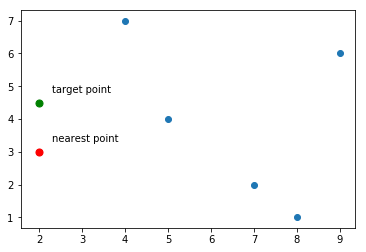

In [76]:
main()

#### PCA

(1797, 64) (1797,)
pc1:  [  0.92867919  -8.28839856  -7.32271022 ... -11.13207095   4.54131284
   0.01360237]
pc2:  [-19.55461647  22.48896597  11.67625342 ...   8.68051925 -10.7036866
  -4.64528218]
0 [0 1 2 ... 8 9 8]
1 [0 1 2 ... 8 9 8]
2 [0 1 2 ... 8 9 8]
3 [0 1 2 ... 8 9 8]
4 [0 1 2 ... 8 9 8]
5 [0 1 2 ... 8 9 8]
6 [0 1 2 ... 8 9 8]
7 [0 1 2 ... 8 9 8]
8 [0 1 2 ... 8 9 8]
9 [0 1 2 ... 8 9 8]


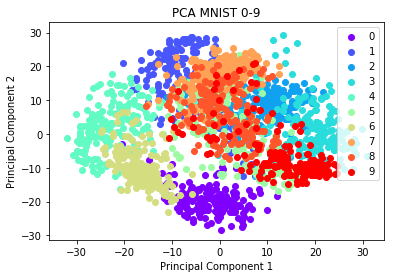

In [59]:
import matplotlib.pyplot as plt
from sklearn import datasets


def PCA(X, n):
    diff = X - X.mean(axis=0)
    covariance_matrix = diff.T.dot(diff)/(X.shape[0]-1)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort the eigenvalues and corresponding eigenvectors descending and select the first n
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx][:n]
    eigenvectors = eigenvectors[:, idx][:, :n]
    
    # Project the data onto principal components
    X_transformed = X.dot(eigenvectors)
    return X_transformed

    
def main():
    data = datasets.load_digits()
    X = data.data
    y = data.target
    print(X.shape, y.shape)
    
    # Project the data onto the 2 pcs
    X_trans = PCA(X, 2)

    # pc1
    x1 = X_trans[:, 0]
    print('pc1: ', x1)
    # pc2
    x2 = X_trans[:, 1]
    print('pc2: ', x2)

    cmap = plt.get_cmap('rainbow')
    colors = [cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]

    class_distr = []
    # Plot the different class distributions
    for i, l in enumerate(np.unique(y)):
        print(l, y)
        _x1 = x1[y == l]
        _x2 = x2[y == l]
        class_distr.append(plt.scatter(_x1, _x2, color=colors[i]))

    plt.legend(class_distr, y, loc=1)

    # Axis labels
    plt.title("PCA MNIST 0-9")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


if __name__ == "__main__":
    main()

## Simple Linear Regression

For now assume just one independent variable x, and one
 dependent y
 
- Multiple linear rg assumes an input vector of x
- Multivariate 1inear rg assumes an output vector y

We will fit the points with a linear hyper-plane




> How to determine the optimal fit line?

- Choose an objective function
- For simple linear regression we choose sum squared error (SSE)

$$\sum (d_i - y_i)^2 = \sum(e_i)^2$$

- Thus, find the line with __least squares__

- __Bias-Variance Trade-off__
![](images/bias-variance-tradeoff.png)

#### build KNN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split, normalize, accuracy_score
from mlfromscratch.utils import euclidean_distance, Plot


class KNN():
    """ K Nearest Neighbors classifier.

    Parameters:
    -----------
    k: int
        The number of closest neighbors that will determine the class of the 
        sample that we wish to predict.
    """
    def __init__(self, k=5):
        self.k = k

    def _vote(self, neighbor_labels):
        counts = np.bincount(neighbor_labels.astype('int'))
        return counts.argmax()

    def predict(self, X_test, X_train, y_train):
        y_pred = np.empty(X_test.shape[0])
        # Determine the class of each sample
        for i, test_sample in enumerate(X_test):
            # Sort the training samples by their distance to the test sample and get the K nearest
            idx = np.argsort([euclidean_distance(test_sample, x) for x in X_train])[:self.k]
            # Extract the labels of the K nearest neighboring training samples
            k_nearest_neighbors = np.array([y_train[i] for i in idx])
            # Label sample as the most common class label
            y_pred[i] = self._vote(k_nearest_neighbors)

        return y_pred


def main():
    data = datasets.load_iris()
    X = normalize(data.data)
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    clf = KNN(k=5)
    y_pred = clf.predict(X_test, X_train, y_train)
    
    accuracy = accuracy_score(y_test, y_pred)

    print ("Accuracy:", accuracy)

    # Reduce dimensions to 2d using pca and plot the results
    Plot().plot_in_2d(X_test, y_pred, title="K Nearest Neighbors", accuracy=accuracy, legend_labels=data.target_names)


if __name__ == "__main__":
    main()

#### pick up Word2Vec & Glove

#### mark down some basic functions in NLTK and Gensim

#### Example of RNN for sequential data 

### Something to think about

- [Doc2Vec?](https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5)